Pesos dos neurônios após o treinamento (2 grupos):
[[5.32560190e-01 2.04447549e-01]
 [9.25599350e-01 4.24607392e-01]
 [1.41747877e-01 9.43500360e-01]
 [9.99991850e-01 1.99989165e+00]
 [1.94409601e-01 8.98938318e-01]
 [8.42399194e-01 2.46065320e-01]
 [6.35977671e-02 1.57743122e-01]
 [7.34064446e-01 6.19148953e-01]
 [8.51256540e-01 4.11748633e-01]
 [9.32720553e-02 3.43372254e-01]
 [7.36552002e-01 6.74904837e-01]
 [9.49630554e-01 5.81492107e-01]
 [2.52631579e+00 3.52631578e+00]
 [9.94729709e-01 6.98653559e-01]
 [7.88732238e-01 7.30835615e-03]
 [7.04695236e-01 6.71355387e-01]
 [6.84950747e-01 6.80319346e-01]
 [9.46291854e-01 6.42681785e-01]
 [7.22909871e-01 1.38257187e-01]
 [8.07011070e+00 9.07011070e+00]]


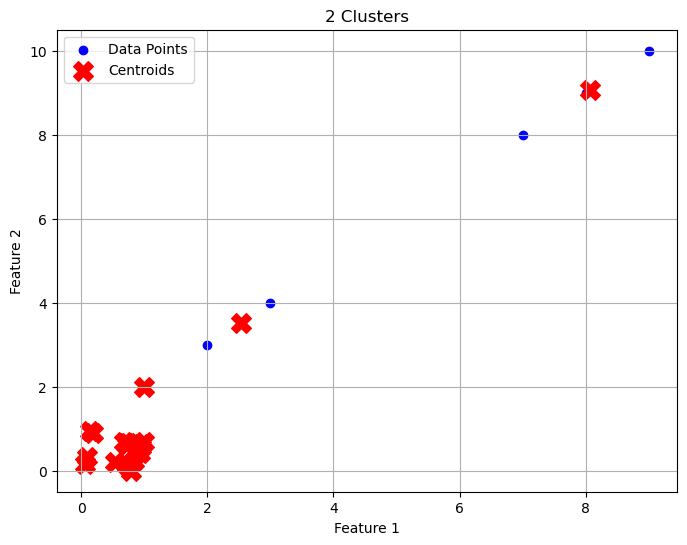

Pesos dos neurônios após o treinamento (3 grupos):
[[4.03036701e-01 2.84635585e-01]
 [5.31450309e-01 8.13720065e-01]
 [6.73588077e-01 2.55790376e-01]
 [5.77118895e-01 4.16210487e-01]
 [6.73842614e-01 5.80093461e-01]
 [6.05307166e-01 2.95263385e-02]
 [6.98420063e-01 3.56437841e-01]
 [1.34138823e-01 3.28955443e-01]
 [3.78994122e-01 1.54453559e-01]
 [5.33812369e-01 3.11492943e-01]
 [4.09921329e-01 1.11450346e-01]
 [8.04972376e+00 8.46815935e+00]
 [8.75276474e-01 5.52345600e-01]
 [2.84740790e-01 2.18802363e-01]
 [6.92493890e-01 4.67693172e-01]
 [7.23956942e-01 3.30702471e-01]
 [7.95518414e-01 7.01408719e-01]
 [6.00752852e-01 4.42772762e-01]
 [9.75843267e-01 5.69078991e-01]
 [2.70110701e+00 2.96309963e+00]
 [5.92429046e-01 7.20261703e-01]
 [7.01696082e-01 5.48532602e-01]
 [9.99970994e-01 1.99993937e+00]
 [3.67553527e-01 5.85360516e-01]
 [6.81558652e-01 3.36655704e-01]
 [9.32073240e-01 2.05426572e-02]
 [4.60633019e-01 7.01633610e-01]
 [3.45642490e-01 4.33434466e-03]
 [2.77233885e-02 9.576483

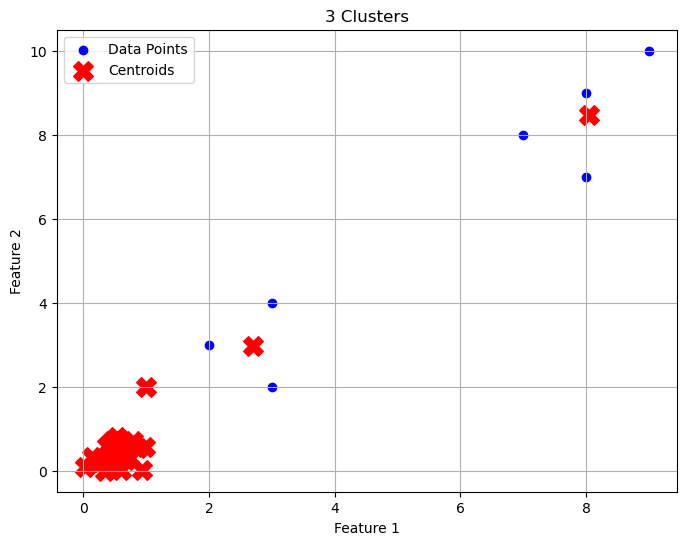

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class VectorQuantificacao:
    def __init__(self, input_size, num_neurons, learning_rate=0.1, num_epochs=100):
        self.input_size = input_size
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # Inicialização dos pesos dos neurônios
        self.weights = np.random.rand(num_neurons, input_size)
      
        
    def train(self, data):
        for epoch in range(self.num_epochs):
            for x in data:
                # Encontre o neurônio vencedor (o mais próximo do ponto de entrada)
                winner_index = self._find_winner(x)

                # Atualize os pesos do neurônio vencedor
                self.weights[winner_index] += self.learning_rate * (x - self.weights[winner_index])
                
    def _find_winner(self, x):
        # Calcule as distâncias entre o ponto de entrada e os pesos de todos os neurônios
        distances = np.linalg.norm(self.weights - x, axis=1)
        
        # Encontre o índice do neurônio com a menor distância (o vencedor)
        winner_index = np.argmin(distances)
        return winner_index

def plot_clusters(data, centroids, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c='blue', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define o conjunto de dados de entrada com 2 grupos
data_2_clusters = np.array([[1, 2],
                            [2, 3],
                            [3, 4],
                            [7, 8],
                            [8, 9],
                            [9, 10]])


# Cria e treina o vetor quantizado com 2 grupos
vq_2_clusters = VectorQuantificacao(input_size=2, num_neurons=2, learning_rate=0.1, num_epochs=100)
vq_2_clusters.train(data_2_clusters)

# Imprime os pesos dos neurônios após o treinamento
print("Pesos dos neurônios após o treinamento (2 grupos):")
print(vq_2_clusters.weights)

# Visualiza os resultados com Matplotlib
plot_clusters(data_2_clusters, vq_2_clusters.weights, '2 Clusters')

# Define o conjunto de dados de entrada com 3 grupos

data_3_clusters = np.array([[1, 2],
                            [2, 3],
                            [3, 4],
                            [7, 8],
                            [8, 9],
                            [9, 10],
                            [3, 2],
                            [8, 7]])

# Cria e treina o vetor quantizado com 3 grupos
vq_3_clusters = VectorQuantificacao(input_size=2, num_neurons=3, learning_rate=0.1, num_epochs=100)
vq_3_clusters.train(data_3_clusters)

# Imprime os pesos dos neurônios após o treinamento
print("Pesos dos neurônios após o treinamento (3 grupos):")
print(vq_3_clusters.weights)

# Visualiza os resultados com Matplotlib
plot_clusters(data_3_clusters, vq_3_clusters.weights, '3 Clusters')